In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
sns.set_style("whitegrid")
df = pd.read_csv('clean_drug_consumption.csv')
df.head()

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Education Level
0,0,1,35-44,Female,-0.05921,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,...,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,Professional Certificate/ Diploma
1,1,2,25-34,Male,1.98437,UK,White,-0.67825,1.93886,1.43533,...,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,Doctorate Degree
2,2,3,35-44,Male,-0.05921,UK,White,-0.46725,0.80523,-0.84732,...,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,Professional Certificate/ Diploma
3,3,4,18-24,Female,1.16365,UK,White,-0.14882,-0.80615,-0.01928,...,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,Masters Degree
4,4,5,35-44,Female,1.98437,UK,White,0.73545,-1.63340,-0.45174,...,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,Doctorate Degree


In [3]:
df["Mushrooms"].value_counts()

CL0    982
CL3    275
CL2    260
CL1    209
CL4    115
CL5     40
CL6      4
Name: Mushrooms, dtype: int64

In [4]:
def hasTrippedMushrooms(x):
    if x == "CL0" or x == "CL1" or x == "CL2" or x == "CL3" or x == "CL4":
        return 0
    else:
        return 1 


0    1841
1      44
Name: Tripped Shrooms?, dtype: int64

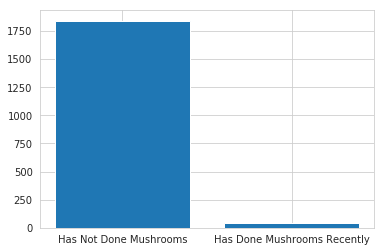

In [5]:
df["Tripped Shrooms?"] = df["Mushrooms"].apply(hasTrippedMushrooms)
df["Tripped Shrooms?"].value_counts()
xvals = ["Has Not Done Mushrooms", "Has Done Mushrooms Recently"]
plt.bar(xvals, df["Tripped Shrooms?"].value_counts())
#plt.set_title("Have ")
#df.head()
df["Tripped Shrooms?"].value_counts()

0    1816
1      69
Name: Tripped LSD?, dtype: int64

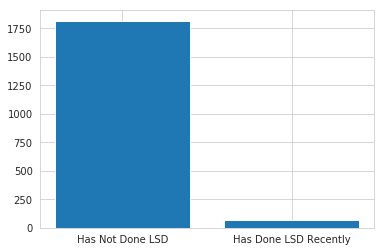

In [6]:
def hasTrippedLSD(x):
    if x == "CL0" or x == "CL1" or x == "CL2" or x == "CL3" or x == "CL4":
        return 0
    else:
        return 1  

df["Tripped LSD?"] = df["LSD"].apply(hasTrippedLSD)
df["Tripped LSD?"].value_counts()
xvals = ["Has Not Done LSD", "Has Done LSD Recently"]

plt.bar(xvals, df["Tripped LSD?"].value_counts())
df["Tripped LSD?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

# Insight 
More people have done mushrooms than LSD before 

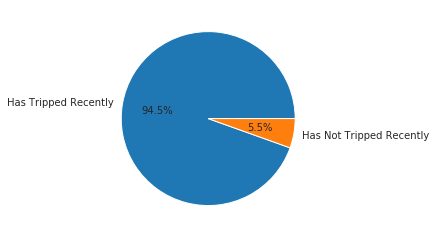

In [7]:
def hasTripped(x):
    if x == "CL0":
        return 0
    else:
        return 1 
def isolate(x): 
    if x == 1 or x ==2: 
        return 1 
    else: 
        return 0 
    
df["Tripped?"] = df["Tripped Shrooms?"] + df["Tripped LSD?"] 
df["Tripped?"] = df["Tripped?"].apply(isolate)

df["Tripped?"].value_counts()
xvals = ["Has Tripped Recently", "Has Not Tripped Recently"]

plt.pie(df["Tripped?"].value_counts(), labels = xvals, autopct='%1.1f%%');

#df["Tripped?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

0    1782
1      93
2      10
Name: Tripped on how many?, dtype: int64

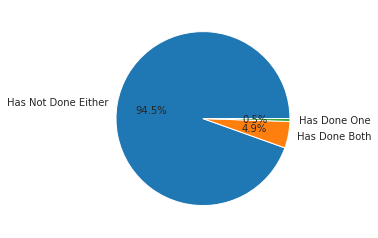

In [8]:
def hasTripped(x):
    if x == "CL0":
        return 0
    else:
        return 1 

df["Tripped on how many?"] = df["Tripped Shrooms?"] + df["Tripped LSD?"] 
df["Tripped on how many?"].value_counts()
xvals = ["Has Not Done Either", "Has Done Both", "Has Done One"]

plt.pie(df["Tripped on how many?"].value_counts(), labels = xvals,autopct='%1.1f%%')
df["Tripped on how many?"].value_counts()
#plt.set_title("Have ")
#df.head()
#

In [9]:
print("Openness Score of People Who Have Tripped in the Past Month")
df[df["Tripped?"] == 1]['Oscore'].mean()

Openness Score of People Who Have Tripped in the Past Month


0.7190150485436886

In [10]:
print("Openness Score of People Who Have Never Tripped in the Past Month")
df[df["Tripped?"] == 0]['Oscore'].mean()

Openness Score of People Who Have Never Tripped in the Past Month


-0.04212451739618432

In [11]:
mean_diff = df[df["Tripped?"] == 1]['Oscore'].mean() - df[df["Tripped?"] == 0]['Oscore'].mean()

In [12]:
print("Mean Openness Score")
df['Oscore'].mean()

Mean Openness Score


-0.0005343978779840978

In [13]:
df[df["Tripped?"] == 1][:].mean() - df[:].mean()

Unnamed: 0              265.378641
ID                      266.035137
Education                -0.429436
Nscore                   -0.048379
Escore                    0.295865
Oscore                    0.719549
Ascore                    0.011529
Cscore                   -0.277682
Impulsive                 0.299396
SS                        0.620494
Tripped Shrooms?          0.403842
Tripped LSD?              0.633298
Tripped?                  0.945358
Tripped on how many?      1.037140
dtype: float64

# Affect of Tripping 
It seems that the average openness of a psychedelic user is much higher than any other category 

In [14]:
np.std(df[df["Tripped?"] == 1]['Oscore'])

0.8127608962825219

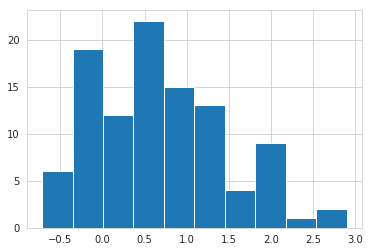

In [15]:
fig, ax = plt.subplots()
ax = plt.hist(df[df["Tripped?"] == 1]['Oscore'])

(array([  6.,  33., 126., 243., 334., 439., 328., 212.,  44.,  17.]),
 array([-3.27393 , -2.656376, -2.038822, -1.421268, -0.803714, -0.18616 ,
         0.431394,  1.048948,  1.666502,  2.284056,  2.90161 ]),
 <a list of 10 Patch objects>)

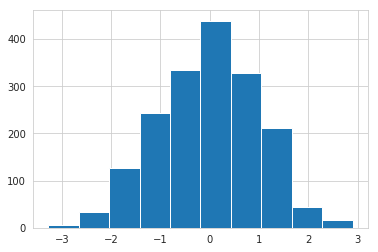

In [16]:
plt.hist(df[df["Tripped?"] == 0]['Oscore'])

# Psychedelic Openness Hypothesis Testing 


Null Hypothesis H0: that the mean openness for non-psychedelic users = the mean openness for psychedelic users 
Ha: Psych users are more open 

In [17]:
var0 = (np.var(df[df["Tripped?"] == 0]['Oscore']))/len(df[df["Tripped?"] == 0]['Oscore'])
var1 = (np.var(df[df["Tripped?"] == 1]['Oscore']))/len(df[df["Tripped?"] == 1]['Oscore'])

shared_sample_variance = var0 + var1
#print(shared_sample_variance)
diff_in_Oscore = stats.norm(0, np.sqrt(shared_sample_variance))




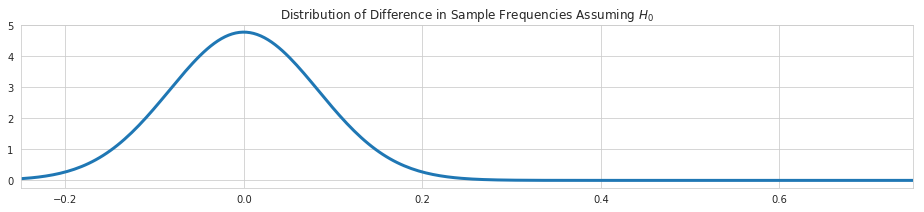

In [18]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-0.25, 0.75, num=250)
ax.plot(x, diff_in_Oscore.pdf(x), linewidth=3)
ax.set_xlim(-0.25, 0.75)
ax.axvline(mean_diff)

ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$");

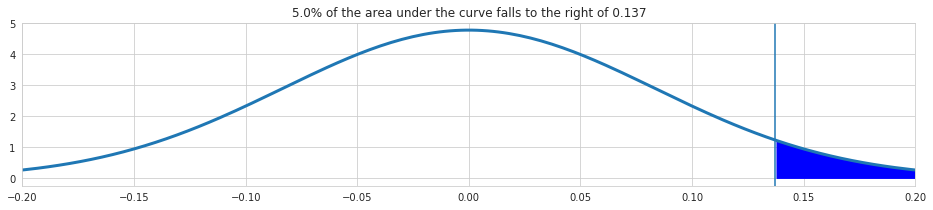

In [19]:
𝛼 = 0.05
x = np.linspace(-3, 3, num=2500)
threshold = diff_in_Oscore.ppf(1-𝛼)

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, diff_in_Oscore.pdf(x), linewidth=3)
ax.axvline(threshold)
ax.set_xlim(-0.2, 0.20)
ax.fill_between(x, 0, diff_in_Oscore.pdf(x), x>threshold, color = 'blue')
ax.set_title(f'{100*𝛼}% of the area under the curve falls to the right of {round(threshold,3)}');

In [20]:
mean_diff = df[df["Tripped?"] == 1]['Oscore'].mean() - df[df["Tripped?"] == 0]['Oscore'].mean()
mean_diff

0.7611395659398729

In [21]:
p_value = 1 - diff_in_Oscore.cdf(mean_diff)
p_value 
#print("p-value for openness comparison: {:2.3f}".format(p_value))

0.0

In [22]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Oscore'], df[df["Tripped?"] == 0]['Oscore'])
tdiff_in_Oscore[1]

3.103369193704288e-14

In [23]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Impulsive'], df[df["Tripped?"] == 0]['Impulsive'])
tdiff_in_Oscore[1]

0.0010466524379681224

In [24]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['SS'], df[df["Tripped?"] == 0]['SS'])
tdiff_in_Oscore[1]

1.3909531587679372e-11

In [25]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Ascore'], df[df["Tripped?"] == 0]['Ascore'])
tdiff_in_Oscore[1]

0.9040030468822055

In [26]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Cscore'], df[df["Tripped?"] == 0]['Cscore'])
tdiff_in_Oscore[1]

0.003640144767675931

In [27]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Nscore'], df[df["Tripped?"] == 0]['Nscore'])
tdiff_in_Oscore[1]

0.6130251057451219

In [28]:
tdiff_in_Oscore = stats.ttest_ind(df[df["Tripped?"] == 1]['Escore'], df[df["Tripped?"] == 0]['Escore'])
tdiff_in_Oscore[1]

0.0019425582876144043

In [29]:
df[df["Tripped?"] == 1][:].mean() - df[:].mean()

Unnamed: 0              265.378641
ID                      266.035137
Education                -0.429436
Nscore                   -0.048379
Escore                    0.295865
Oscore                    0.719549
Ascore                    0.011529
Cscore                   -0.277682
Impulsive                 0.299396
SS                        0.620494
Tripped Shrooms?          0.403842
Tripped LSD?              0.633298
Tripped?                  0.945358
Tripped on how many?      1.037140
dtype: float64

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Meth,Mushrooms,Nicotine,Semer,VSA,Education Level,Tripped Shrooms?,Tripped LSD?,Tripped?,Tripped on how many?
0,0,1,35-44,Female,-0.05921,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,...,CL0,CL0,CL2,CL0,CL0,Professional Certificate/ Diploma,0,0,0,0
1,1,2,25-34,Male,1.98437,UK,White,-0.67825,1.93886,1.43533,...,CL3,CL0,CL4,CL0,CL0,Doctorate Degree,0,0,0,0
2,2,3,35-44,Male,-0.05921,UK,White,-0.46725,0.80523,-0.84732,...,CL0,CL1,CL0,CL0,CL0,Professional Certificate/ Diploma,0,0,0,0
3,3,4,18-24,Female,1.16365,UK,White,-0.14882,-0.80615,-0.01928,...,CL0,CL0,CL2,CL0,CL0,Masters Degree,0,0,0,0
4,4,5,35-44,Female,1.98437,UK,White,0.73545,-1.63340,-0.45174,...,CL0,CL2,CL2,CL0,CL0,Doctorate Degree,0,0,0,0
